In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from scipy import optimize
#from scipy.optimize import least_squares
import numpy as np
#from numpy.random import normal
plot_scale= 6

#First entry is if you want raw data 
plot_raw_data =False
#Second is Clean plots
plot_and_clean_data =True


In [106]:
def plot_raw(data,plotname,fit = False):
    bold = '\033[1m'
    end = '\033[0m'
    #fig, ax =plt.subplots(2,3,figsize = (2*plot_scale,1*plot_scale), layout="constrained")
    title = "Overall Data Plotted from file " + plotname
    
    
    plt.scatter(data.Counts,data.AC)


    def square_wave_func(x,f, a, h,phi):
        return h+a*np.sin(np.cos(2* np.pi *f*x +phi))
    def params():
        params, params_convarince =optimize.curve_fit(square_wave_func,x,y)
        return params, params_convarince

    if fit :
        ax[0,0].plot(data.Counts,square_wave_func(data.A,))
        
    path = 'plots/'
    try:
        path =os.path.join(path, plotname)
        fig.savefig(path)
    except OSError as error:
        if os.path.exists(path):
            os.remove(path)
            path =os.path.join(path, plotname)
    plt.close()
    return fig

In [107]:
def plot_cleaned(data,plotname):
    bold = '\033[1m'
    end = '\033[0m'
    
    title = "Cleaned Data Plotted from file " + plotname
    #fig.suptitle(title, weight= 'bold',fontsize = 2*plot_scale)
    #fig.add_gridspec #double check
    #fig.supylabel("Amplitude", weight = 'bold',fontsize =1.5*plot_scale)
    #fig.supxlabel("Count Number (time)", weight = 'bold',fontsize = 1.5*plot_scale)
    
    
    data['PercentDiff_AB'] = (data['AB'].pct_change() * 100).fillna(0)
    data['PercentDiff_AB_1'] = (data['AB'].pct_change(periods=-1) * 100).fillna(0)
    data['PercentDiff_AC'] = (data['AC'].pct_change() * 100).fillna(0)
    data['PercentDiff_AC_1'] = (data['AC'].pct_change(periods =-1) * 100).fillna(0)
    
    percent_error=22
    data = data[np.abs(data['PercentDiff_AB'])<=percent_error]
    data =data[np.abs(data['PercentDiff_AB_1']) <=percent_error]
    data = data[np.abs(data['PercentDiff_AC']) <=percent_error]
    data =data[np.abs(data['PercentDiff_AC_1']) <=percent_error ]
    
    norm_AB = np.linalg.norm(data.AB)
    norm_AC = np.linalg.norm(data.AC)
    
    min_val_AB = np.min(data.AB)
    max_val_AB = np.max(data.AB)
    data.AB = (data.AB - min_val_AB) / (max_val_AB - min_val_AB)
    
    min_val_AC = np.min(data.AC)
    max_val_AC = np.max(data.AC)
    data.AC = (data.AC - min_val_AC) / (max_val_AC - min_val_AC)
    

    
    #plt.set_title("AB")
    plt.scatter(data.Counts,data.AB, color= 'blue')
    
    
    path = 'plots_cleaned/'
    try:
        path =os.path.join(path, plotname)
        path = str(path+".pdf")
        plt.savefig(path )
    except OSError as error:
        if os.path.exists(path):
            os.remove(path)
            path =os.path.join(path, plotname)
    #plt.close()
    return plt

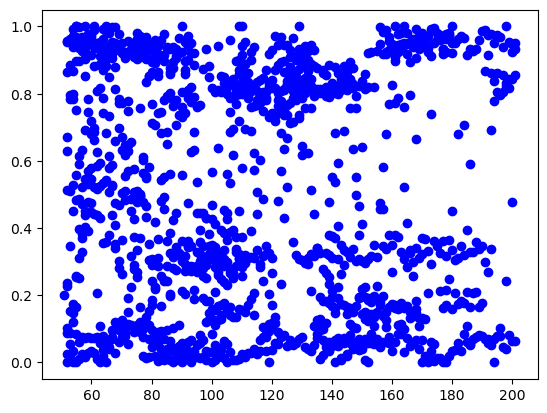

In [108]:
def run(plots = True,plot_clean = True):
    files = []
    for f in glob.glob("Data/*.txt"):
        file = pd.read_csv(f,delimiter="\t")
        file = file.loc[~(file ==0).all(axis=1)]
        file = file.iloc[:,0:6]
        file.columns =['Counts','A','B','AB','C','AC']
        name = f.split('.txt')[0].split('\\')[1]
       
        plot_cleaned(file,name)        
run(plot_raw_data,plot_and_clean_data)

In [109]:
"""from scipy.fft import fft, fftfreq
from sklearn import preprocessing

data = np.array(file.AB).reshape(-1,1)
yf = fft(data)
plt.plot(file.Counts, yf/(np.max(data)/2))
#plt.plot(file.Counts,file.AB)
plt.show()
"""


'from scipy.fft import fft, fftfreq\nfrom sklearn import preprocessing\n\ndata = np.array(file.AB).reshape(-1,1)\nyf = fft(data)\nplt.plot(file.Counts, yf/(np.max(data)/2))\n#plt.plot(file.Counts,file.AB)\nplt.show()\n'